$\Large\textbf{Lab 3.}$ $\large\textbf{Exercise 1.}$



In the last lab, when we tried to solve certain problems of the form $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$ using gradient descent algorithm, we noticed that the algorithm needed a large number of iterations to find the minimizer. Today we will discuss some remedy measures for this issue.  

Consider the problem $\min_{\mathbf{x}} f(\mathbf{x}) = 1500x_1^2 + 4x_1 x_2 +  x_2^2$. 

Note that the function $f(\mathbf{x})$ is twice continuously differentiable. First let us investigate the Hessian $\nabla^2 f(\mathbf{x})$ of the function. 

We shall find the condition number of the Hessian given by $\kappa\left (\nabla^2 f(\mathbf{x}) \right ) = \frac{\lambda_{\max} \left (\nabla^2 f(\mathbf{x}) \right )}{\lambda_{\min} \left (\nabla^2 f(\mathbf{x}) \right )}$, where $\lambda_{\max}(\mathbf{A})$ denotes the maximum eigen value of matrix $\mathbf{A}$ and $\lambda_{\min}(\mathbf{A})$ denotes the minimum eigen value of matrix $\mathbf{A}$.  




$\textbf{Question 2:}$ Write code to find the Hessian matrix of the function $f(\mathbf{x}) = 1500x_1^2 + 4x_1 x_2 +  x_2^2$ and its condition number. 

Here, $f(\mathbf{x}) = 1500x_1^2 + 4x_1 x_2 +  x_2^2$


$\therefore f_{x_1}(\mathbf{x}) = 3000x_1 + 4x_2$ 


$\therefore f_{x_1^2}(\mathbf{x}) = 3000$ 


$\therefore f_{x_1x_2}(\mathbf{x}) = 4$ 


$\therefore f_{x_2}(\mathbf{x}) = 4x_1 + 2x_2$ 


$\therefore f_{x_2^2}(\mathbf{x}) = 2$ 


$\therefore f_{x_2x_1}(\mathbf{x}) = 4$ 

$\therefore\nabla^2 f(\mathbf{x}) =
\begin{bmatrix}
  f_{x_1^2}(\mathbf{x}) & 
    f_{x_1x_2}(\mathbf{x})  \\
  f_{x_2x_1}(\mathbf{x}) & 
    f_{x_2^2}(\mathbf{x})
\end{bmatrix}
=
\begin{bmatrix}
  3000 & 4 \\ 4 & 2
\end{bmatrix}$


To find the $\textbf{conditional number} \hspace{2mm} \kappa\left (\nabla^2 f(\mathbf{x}) \right ) = \frac{\lambda_{\max} \left (\nabla^2 f(\mathbf{x}) \right )}{\lambda_{\min} \left (\nabla^2 f(\mathbf{x}) \right )}$, we have a built-in function in the numpy package.

In [201]:
import numpy as np 
#method to find Hessian matrix
def evalh(x): 
  assert type(x) is np.ndarray 
  assert len(x) == 2
  return np.array([[3000, 4], [4, 2]])

#method to find the condition number of any square matrix
def find_condition_number(A):
  assert type(A) is np.ndarray
  assert A.shape[0] == A.shape[1]
  return np.linalg.cond(A, p=None)
np.linalg.eig(evalh(np.array([1,1])))[0]

array([3.00000534e+03, 1.99466312e+00])

The condition number of the Hessian plays a major role in the progress of the iterates of gradient descent towards the optimal solution point. Typically a large value of the condition number indicates that the problem is $\textbf{ill-conditioned}$ and hence leads to slow progress of the iterates towards the optimal solution point. Now we shall discuss a method which would help in better $\textbf{conditioning}$ of the problem and hence would help in speeding up the progress of the iterates towards the optimal solution point. 

Let us first illustrate an equivalent transformation of the problem $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$. Consider the transformation $\mathbf{x}=\mathbf{My}$ where $\mathbf{M}\in {\mathbb{R}}^{n \times n}$ is an invertible matrix and $\mathbf{y} \in {\mathbb{R}}^n$ and consider the equivalent problem $\min_{\mathbf{y} \in {\mathbb{R}}^n} g(\mathbf{y}) \equiv \min_{\mathbf{y} \in {\mathbb{R}}^n} f(\mathbf{My})$. 

Note that the gradient $\nabla g(\mathbf{y}) = \mathbf{M}^\top \nabla f(\mathbf{My})$ and the Hessian is $\nabla^2 g(\mathbf{y}) = \mathbf{M}^\top \nabla^2 f(\mathbf{My}) \mathbf{M}$. 

Hence the gradient descent update to solve $\min_{\mathbf{y} \in {\mathbb{R}}^n} g(\mathbf{y})$ becomes: 
\begin{align}
{\mathbf{y}}^{k+1} &= {\mathbf{y}}^{k} - \eta \nabla g(\mathbf{y}^{k}) \\
&= {\mathbf{y}}^{k} - \eta {\mathbf{M}}^\top \nabla f(\mathbf{M}\mathbf{y}^{k}) \\
\end{align}
Pre-multiplying by $\mathbf{M}$, we have:
\begin{align}
{\mathbf{M}\mathbf{y}}^{k+1} &= {\mathbf{M}\mathbf{y}}^{k} -  \eta \mathbf{MM}^\top \nabla f(\mathbf{M}\mathbf{y}^{k})  \\
\implies \mathbf{x}^{k+1} &= \mathbf{x}^{k} - \eta \mathbf{MM}^\top \nabla f({\mathbf{x}}^{k}) 
\end{align}

Letting $\mathbf{D} = \mathbf{MM}^\top$, we see that the update is of the form:
\begin{align}
\mathbf{x}^{k+1} &= \mathbf{x}^{k} - \eta \mathbf{D} \nabla f({\mathbf{x}}^{k}) 
\end{align}

Note that the matrix $\mathbf{D}$ is symmetric and positive definite and hence can be written as $\mathbf{D} = \mathbf{B}^2$, where $\mathbf{B}$ is also symmetric and positive definite. Denoting $\mathbf{B}= \mathbf{D}^{\frac{1}{2}}$, we see that a useful choice for the matrix $\mathbf{M}$ is $\mathbf{M} = \mathbf{B} = \mathbf{D}^{\frac{1}{2}}$. 

The matrix $\mathbf{D}$ is called a $\textbf{scaling}$ matrix and helps in scaling the Hessian. We will consider $\mathbf{D}$ to be a diagonal matrix. Thus it would be useful to find a useful candidate of the scaling matrix at each iteration which could help in significant progress of the iterates towards the optimal solution. 




This discussion leads to the following algorithm:
\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$}  \\
& \textbf{Initialize } k=0 \\ 
& \mathbf{p}^k =-\nabla f(\mathbf{x}^k) \\ 
&\textbf{While } \| \mathbf{p}^k \|_2 > \tau \text{ do:}  \\   
&\quad \quad \text{ Choose a suitable scaling matrix }\mathbf{D}^k. \\ 
&\quad \quad \eta^k = \arg\min_{\eta\geq 0} f(\mathbf{x}^k + \eta  \mathbf{D}^k \mathbf{p}^k) = \arg\min_{\eta\geq 0} f(\mathbf{x}^k - \eta  \mathbf{D}^k \nabla f(\mathbf{x}^k)) \\
&\quad \quad \mathbf{x}^{k+1} = \mathbf{x}^k + \eta^k \mathbf{D}^k \mathbf{p}^k = \mathbf{x}^k - \eta^k \nabla \mathbf{D}^k \nabla f(\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}

Note that the update step in the modified gradient descent scheme uses a scaled gradient. Thus it becomes important to set up some criteria for choosing the $\mathbf{D}^k$ matrix in every iteration. In this exercise, we will assume $\mathbf{D}^k$ to be a diagonal matrix. The following questions will help in designing a suitable $\mathbf{D}^k$.

$\textbf{Question 4:}$ Based on our discussion on condition number and the derivation of the gradient descent scheme with scaling, can you identify and write down the matrix $\mathbf{Q}$ whose condition number needs to be analyzed in the new gradient scheme with scaling? 

$\textbf{Your Answer:}$ 
The matrix $\mathbf{Q}$ whose condition number needs to be analyzed in the new gradient scheme with scaling with $\mathbf{D}^k$ as shown below in the question 5 is:

$\mathbf{Q}$  = $(\mathbf{D}^k)^{\frac{1}{2}} \mathbf{H}^k (\mathbf{D}^k)^{\frac{1}{2}}$

Where, $\mathbf{H}^k = (\nabla^2f(\mathbf{x})) $ is the hessian of a function at each iteration.

$\mathbf{D}^k$ is shown in the question 5 below.

Because of such choice of $\mathbf{Q}$, condition number of in the gradient descent scheme is decreasing almost to $1$ so that out algorithm with scaling becomes so fast.

$\textbf{Question 5:}$ Based on the matrix $\mathbf{Q}$, can you come up with a useful choice for $\mathbf{D}^k$ (assuming *$\mathbf{D}^k$* to be diagonal)?

$\textbf{Your Answer:}$ Diagonal approximation to the Hessian matrix $\nabla^2f( \mathbf{x})$, i.e., the diagonal matrix $\mathbf{D}^k$ that has the inverse second partial derivatives $\Big(\frac{\partial^2f(\mathbf{x_k})}{(\partial x_i)^2}\Big)^{-1}$ along the diagonal. This improves the performance of the gradient method dramatically, by providing automatic scaling of the units in which the components $x_i$ of $\mathbf{x}$ are measured. Because of such choice of $\mathbf{D}^k$, the condition number of $\mathbf{Q}$ is improving and becoming so close to $1$ so that our gradient descent scheme is converging so quickly. Here, product with inverse of diagonal elements of hessian matrix with hessian matrix is causing the improvements in $\mathbf{Q}$ by becoming so close to condition number of identity matrix. This is so helpful in fasterness of the algorithm.

$\therefore \mathbf{D^k} =
\begin{bmatrix}
  \frac{1}{3000} & 0 \\ 0 & \frac{1}{2}
\end{bmatrix}$

Write code to find the matrix $\mathbf{D}^k$. 

In [202]:
#The method defines a way to construct D_k matrix used in scaling the gradient in the modified gradient descent scheme
def compute_D_k(x):
  assert type(x) is np.ndarray
  assert len(x) == 2
  #print(np.linalg.eig(evalh(np.array([1,1]))))
  return np.array([[1/3000, 0], [0, 1/2]])
  #compute and return D_k
#compute_D_k(np.array([1,1]))

In [203]:
#Now we will define a function which will compute and return the function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  return 1500 * x[0]**2 + 4 * x[0] * x[1] + x[1]**2
  #after checking if the argument is valid, we can compute the objective function value
  #compute the function value and return it 
  


In [204]:
#Now we will define a function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  a = 3000 * x[0] + 4 * x[1]
  b = 4 * x[0] + 2 * x[1]
  return np.array([a, b])
  #after checking if the argument is valid, we can compute the gradient value
  #compute the gradient value and return it 
  

In [205]:
#Complete the module to compute the steplength by using the closed-form expression
def compute_steplength_exact(gradf, A): #add appropriate arguments to the function 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(A) is np.ndarray and A.shape[0] == 2 and  A.shape[1] == 2 #allow only a 2x2 array
  g = gradf
  g_t = np.matrix.transpose(g)
  step_length = np.matmul(g_t, g)/(2*np.matmul(np.matmul(g_t, A), g))
  
  return step_length
  #Complete the code 
  

In [206]:
#Complete the module to compute the steplength by using the closed-form expression
def compute_steplength_backtracking(x, gradf, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0. 
  alpha = alpha_start
  p = - gradf
  #implement the backtracking line search
  #print(evalf(x + alpha*p), evalf(x) + gamma * alpha* (np.matmul(np.matrix.transpose(p), p) ))
  while evalf(x + alpha*p) > evalf(x) + gamma * alpha* (np.matmul(np.matrix.transpose(gradf), p) ):
    alpha = alpha * rho
  return alpha
  #Complete the code 
  
  

In [207]:
def compute_steplength_backtracking_scaled_direction(x, gradf, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  #assert type(direction) is np.ndarray and len(direction) == 2 
  assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0. 
  alpha = alpha_start
  p = - gradf
  D_k = compute_D_k(x)
  #implement the backtracking line search
  #print(evalf(x + alpha*p), evalf(x) + gamma * alpha* (np.matmul(np.matrix.transpose(p), p) ))
  while evalf(x + alpha*np.matmul(D_k,p)) > evalf(x) + gamma * alpha* (np.matmul(np.matrix.transpose(gradf), np.matmul(D_k,p)) ):
    alpha = alpha * rho
  return alpha
  
  
  #Complete the code 

In [208]:
#line search type 
EXACT_LINE_SEARCH = 1
BACKTRACKING_LINE_SEARCH = 2
CONSTANT_STEP_LENGTH = 3

In [209]:
#complete the code for gradient descent to find the minimizer
def find_minimizer_gd(start_x, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  x = start_x
  g_x = evalg(x)
  A = np.array([[1500, 2], [2, 1]])
  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
    #print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)

  k = 0
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
  
    if line_search_type == EXACT_LINE_SEARCH:
      step_length = compute_steplength_exact(g_x, A) #call the new function you wrote to compute the steplength
      #raise ValueError('EXACT LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking(x, g_x, alpha_start, rho, gamma) #call the new function you wrote to compute the steplength
      #raise ValueError('BACKTRACKING LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == CONSTANT_STEP_LENGTH: #do a gradient descent with constant step length
      step_length = 0.1
    else:  
      raise ValueError('Line search type unknown. Please check!')
    
    #implement the gradient descent steps here  
    x = np.subtract(x, np.multiply(step_length, g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point
  return x, k
  #Complete the code   


In [210]:
#complete the code for gradient descent with scaling to find the minimizer

def find_minimizer_gdscaling(start_x, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  x = start_x
  g_x = evalg(x)
  A = np.array([[1500, 2], [2, 1]])
  D_k = compute_D_k(x)
  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
    #print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)

  k = 0
  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
  
    if line_search_type == EXACT_LINE_SEARCH:
      step_length = compute_steplength_exact(g_x, A) #call the new function you wrote to compute the steplength
      #raise ValueError('EXACT LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking_scaled_direction(x, g_x, alpha_start, rho, gamma) #call the new function you wrote to compute the steplength
      #raise ValueError('BACKTRACKING LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == CONSTANT_STEP_LENGTH: #do a gradient descent with constant step length
      step_length = 0.1
    else:  
      raise ValueError('Line search type unknown. Please check!')
    
    #implement the gradient descent steps here  
    x = np.subtract(x, np.multiply(step_length,np.matmul(D_k, g_x))) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point
  return x, k
  #Complete the code   

In [211]:
my_start_x = np.array([1.,4000.])
my_tol= 1e-12

In [212]:
#check gradient descent with exact line search 
print("Using Gradient descent with Exact Line Search")
x_opt, k = find_minimizer_gd(my_start_x, my_tol, EXACT_LINE_SEARCH)
print("Minimizer: {}, Minimum function value: {}".format((x_opt[0], x_opt[1]), evalf(x_opt)),"\nNo. of Iterations:", k)

Using Gradient descent with Exact Line Search
Minimizer: (-7.445952307102754e-16, 4.615442908376566e-13), Minimum function value: 2.12480110780353e-25 
No. of Iterations: 14075


In [213]:
#check gradient descent with backtracking line search 
alpha_start = 1.0
rho = 0.5
gamma = 0.5
print("\nUsing Gradient descent with Backtracking Line Search without scaling")
#check what happens when you call find_minimzer using backtracking line search
x_opt_bls, k = find_minimizer_gd(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, alpha_start, rho, gamma)
print("Minimizer: {}, Minimum function value: {}".format((x_opt_bls[0], x_opt_bls[1]), evalf(x_opt_bls)),"\nNo. of Iterations:", k)


Using Gradient descent with Backtracking Line Search without scaling
Minimizer: (-4.78532202235693e-16, 4.5357530103475063e-13), Minimum function value: 2.0520584176089396e-25 
No. of Iterations: 21985


In [214]:
#check gradient descent with scaling and backtracking line search 
alpha_start = 1.
rho = 0.5
gamma = 0.5
print("\nUsing Gradient descent with scaling and Backtracking Line Search")
#check what happens when you call find_minimzer using backtracking line search
x_opt_bls, k = find_minimizer_gdscaling(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, alpha_start, rho, gamma)
print("Minimizer: {}, Minimum function value: {}".format((x_opt_bls[0], x_opt_bls[1]), evalf(x_opt_bls)),"\nNo. of Iterations:", k)


Using Gradient descent with scaling and Backtracking Line Search
Minimizer: (-2.316744047553897e-18, 9.60515433622923e-16), Minimum function value: 9.217397790469283e-31 
No. of Iterations: 16


$\textbf{Question 7:}$


Consider the problem $\min_{\mathbf{x}} f(\mathbf{x}) = 1500x_1^2 + 4x_1 x_2 +  x_2^2$. 

We found the minimizer and the munimum function value of $f(\mathbf{x})$ by using exact line search, backtracking line search with scaling and without scaling and they are as follows:
*   Minimizer: $(0, 0)$
*   Minimum function value: $0$

$\textbf{Question 8:}$

With starting point $\mathbf{x}^0 = (1, 4000)$ and a stopping tolerance $\tau = 10^{-12}$, we found the number of iterations taken
by each of the following gradient descent algorithm. We use $\gamma = \rho = 0.5, \alpha^0 = 1$


$\textbf{1. Exact line search}$

Minimizer: $(-7.445952307102754e-16, 4.615442908376566e-13)$

Minimum function value: $2.12480110780353e-25 $

No. of Iterations:$14075$
    


$\textbf{2. Backtracking line search (without scaling)}$

Minimizer: $(-4.78532202235693e-16, 4.5357530103475063e-13)$

Minimum function value: $ 2.0520584176089396e-25$

No. of Iterations: $21985$

$\textbf{3. Backtracking line search (with scaling)}$

Minimizer: $(-2.316744047553897e-18, 9.60515433622923e-16)$

Minimum function value: $9.217397790469283e-31 $

No. of Iterations: $16 $


Backtracking line search (without scaling) is taking highest number of iterations ($14075$) while exact line search ($21985$) and Backtracking line search (with scaling) ($16$) is converging so quickly. This is because Backtracking line search (with scaling) is scaling the condition number because of that it is so fast. For quadratic functions, exact line search is always fast so converging quickly.

$\textbf{Question 9:}$

With starting point $\mathbf{x}^0 = (1, 4000)$ and a stopping tolerance $\tau = 10^{-12}$, we study the behavior of gradient descent algorithm (without scaling) with backtracking line search, gradient descent algorithm (with scaling) with backtracking line search, for different choices of $\alpha^0$. Take $\gamma = \rho = 0.5$. We tried $\alpha^0\in \{1, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01\}$. For each $\alpha^0$, we recorded the final minimizer, final objective function value and number of iterations to terminate, for the gradient descent algorithm (without scaling) with backtracking line search and the gradient descent algorithm (with scaling) with backtracking line search.

**Gradient descent algorithm (without scaling) with backtracking line search**

In [215]:
alpha_values = [1.0, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
my_start_x = np.array([1.0, 4000.0])
my_tol= 1e-12
iteration_counter = []
for alpha in alpha_values:
  x_opt_bls, iterations_using_backtracking_line_search = find_minimizer_gd(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, alpha, 0.5, 0.5)
  iteration_counter.append(iterations_using_backtracking_line_search)
  print("alpha:", alpha, "\nMinimizer: {}, Minimum function value: {}, No. of Iterations: {}\n".format((x_opt_bls[0], x_opt_bls[1]), evalf(x_opt_bls), iterations_using_backtracking_line_search))
  #print(alpha,"  |(", x_opt_bls[0],",", x_opt_bls[1] , ")|", evalf(x_opt_bls), "|", iterations_using_backtracking_line_search)

alpha: 1.0 
Minimizer: (-4.78532202235693e-16, 4.5357530103475063e-13), Minimum function value: 2.0520584176089396e-25, No. of Iterations: 21985

alpha: 0.9 
Minimizer: (-5.487993551241559e-16, 4.715154501382426e-13), Minimum function value: 2.2174352131747877e-25, No. of Iterations: 15941

alpha: 0.75 
Minimizer: (-7.186438911351236e-16, 4.891753784493455e-13), Minimum function value: 2.386610528547938e-25, No. of Iterations: 6750

alpha: 0.6 
Minimizer: (-6.075542263113186e-16, 4.940366355448921e-13), Minimum function value: 2.43425264283868e-25, No. of Iterations: 6887

alpha: 0.5 
Minimizer: (-4.78532202235693e-16, 4.5357530103475063e-13), Minimum function value: 2.0520584176089396e-25, No. of Iterations: 21985

alpha: 0.4 
Minimizer: (-7.240913284450493e-16, 4.844548192685841e-13), Minimum function value: 2.3407977615582728e-25, No. of Iterations: 11362

alpha: 0.25 
Minimizer: (-4.78532202235693e-16, 4.5357530103475063e-13), Minimum function value: 2.0520584176089396e-25, No. of 

$\alpha^0$ value | Final minimizer | Objective function value | No. of Iterations to terminate
:----:|:---:|:---:|:---:
1.0   |(-4.78532202235693e-16, 4.5357530103475063e-13  )|2.0520584176089396e-25  | 21985
0.9   |( -5.487993551241559e-16, 4.715154501382426e-13 )| 2.2174352131747877e-25 |15941 
0.75   |(-7.186438911351236e-16, 4.891753784493455e-13  )|2.386610528547938e-25  |6705 
0.6   |(-6.075542263113186e-16, 4.940366355448921e-13 )| 2.43425264283868e-25 |6887 
0.5   |(-4.78532202235693e-16, 4.5357530103475063e-13  )| 2.0520584176089396e-25 |21985 
0.4   |( -7.240913284450493e-16, 4.844548192685841e-13 )|2.3407977615582728e-25 | 11362
0.25   |(-4.78532202235693e-16, 4.5357530103475063e-13  )|2.0520584176089396e-25  |21985 
0.1   |( -7.240913284450493e-16, 4.844548192685841e-13 )|2.3407977615582728e-25  |11362 
0.01   |(-5.808527879098581e-16, 4.86459734614113e-13  )|2.3601891237044125e-25|5509 

**Gradient descent algorithm (with scaling) with backtracking line search**

In [216]:
alpha_values = [1.0, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
my_start_x = np.array([1.0, 4000.0])
my_tol= 1e-12
iteration_counter_scaling = []
for alpha in alpha_values:
  x_opt_bls, iterations_using_backtracking_line_search = find_minimizer_gdscaling(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, alpha, 0.5, 0.5)
  iteration_counter_scaling.append(iterations_using_backtracking_line_search)
  print("alpha:", alpha, "\nMinimizer: {}, Minimum function value: {}, No. of Iterations: {}\n".format((x_opt_bls[0], x_opt_bls[1]), evalf(x_opt_bls), iterations_using_backtracking_line_search))
  #print(alpha,"  |(", x_opt_bls[0],",", x_opt_bls[1] , ")|", evalf(x_opt_bls), "|", iterations_using_backtracking_line_search)

alpha: 1.0 
Minimizer: (-2.316744047553897e-18, 9.60515433622923e-16), Minimum function value: 9.217397790469283e-31, No. of Iterations: 16

alpha: 0.9 
Minimizer: (-1.5482543147260356e-16, 5.99636318467777e-15), Minimum function value: 6.819918471923904e-29, No. of Iterations: 21

alpha: 0.75 
Minimizer: (-2.782734498100471e-16, 1.0778486826534047e-14), Minimum function value: 2.203324807217381e-28, No. of Iterations: 32

alpha: 0.6 
Minimizer: (-3.37385169273731e-16, 1.3084958830436248e-14), Minimum function value: 3.2430059206322154e-28, No. of Iterations: 47

alpha: 0.5 
Minimizer: (-2.5114451187192196e-16, 9.759498958643004e-15), Minimum function value: 1.800539902805011e-28, No. of Iterations: 62

alpha: 0.4 
Minimizer: (-3.2653089003091313e-16, 1.2731597062010807e-14), Minimum function value: 3.0539815808527928e-28, No. of Iterations: 83

alpha: 0.25 
Minimizer: (-2.6885302583317696e-16, 1.0548078839184993e-14), Minimum function value: 2.0834135979657747e-28, No. of Iterations: 

$\alpha^0$ value | Final minimizer | Objective function value | No. of Iterations to terminate
:----:|:---:|:---:|:---:
1.0   |(  -2.316744047553897e-18, 9.60515433622923e-16)| 9.217397790469283e-31 |16 
0.9   |(-1.5482543147260356e-16, 5.99636318467777e-15  )|6.819918471923904e-29  |21 
0.75   |(-2.782734498100471e-16, 1.0778486826534047e-14  )|2.203324807217381e-28  | 32
0.6   |(-3.37385169273731e-16, 1.3084958830436248e-14 )|3.2430059206322154e-28 |47 
0.5   |(-2.5114451187192196e-16, 9.759498958643004e-15  )|1.800539902805011e-28  |62 
0.4   |( -3.2653089003091313e-16, 1.2731597062010807e-14 )|  3.0539815808527928e-28|83 
0.25   |(-2.6885302583317696e-16, 1.0548078839184993e-14  )| 2.0834135979657747e-28 |147 
0.1   |(-3.348151030522908e-16, 1.3248133670865728e-14  )|3.2592207464795465e-28  |397
0.01   |(-3.510287787686166e-16, 1.3967083594059075e-14  )|3.602998362211868e-28  |4146 

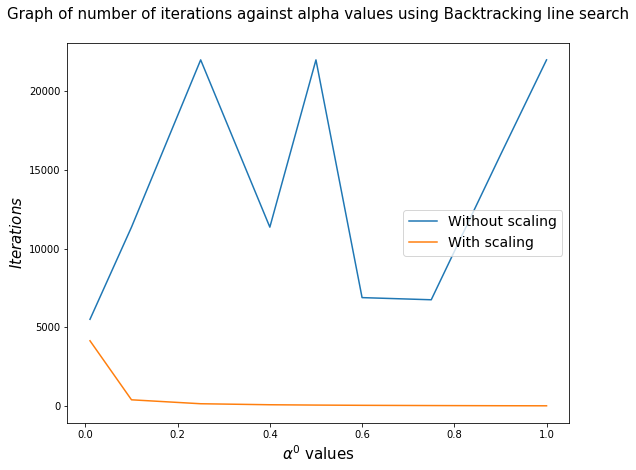

In [217]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,7))
plt.plot(alpha_values, iteration_counter,label=r'$ $')
plt.title('Graph of number of iterations against alpha values using Backtracking line search\n',fontsize=15)
plt.plot(alpha_values, iteration_counter_scaling,label= r'$ $') 
plt.xlabel(r'$\alpha^0$ values',fontsize=15)
plt.ylabel(r'$Iterations$',fontsize=15)
plt.legend(["Without scaling", "With scaling"],fontsize=14)
plt.show()

As shown in the graph and observations table, number of iterations taken by backtracking algorithm with scaling is quite less than the number of iterations taken by backtracking algorithm without scaling. Since we are using scaling of backtracking, we are getting less iterations.

The minimizers and objective function values obtained for different choices of the $\alpha^0$ values for the two algorithms are noted in the above tables. We can see that when we are using scaling, objective value and minimizers are more accurate than without scaling. Iterations are also quite lesser when we scale backtracking algorithm.

$\textbf{Question 10:}$

With starting point $\mathbf{x}^0 = (1, 4000)$ and a stopping tolerance $\tau = 10^{-12}$, we study the behavior of gradient descent algorithm (without scaling) with backtracking line search, gradient descent algorithm (with scaling) with backtracking line search, for different choices of $\rho$. Take $\alpha^0 = 1,\rho = 0.5$. We tried $\rho\in \{0.9, 0.8, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01\}$. For each $\rho$, we recorded the final minimizer, final objective function value and number of iterations to terminate, for the gradient descent algorithm (without scaling) with backtracking line search and the gradient descent algorithm (with scaling) with backtracking line search.

**Gradient descent algorithm (without scaling) with backtracking line search**

In [218]:
rho_values = [0.9, 0.8, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
my_start_x = np.array([1.0, 4000.0])
my_tol= 1e-12
iteration_counter = []
for rho in rho_values:
  x_opt_bls, iterations_using_backtracking_line_search = find_minimizer_gd(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, 1.0, rho, 0.5)
  iteration_counter.append(iterations_using_backtracking_line_search)
  print("rho:", rho, "\nMinimizer: {}, Minimum function value: {}, No. of Iterations: {}\n".format((x_opt_bls[0], x_opt_bls[1]), evalf(x_opt_bls), iterations_using_backtracking_line_search))
  #print(rho,"  |(", x_opt_bls[0],",", x_opt_bls[1] , ")|", evalf(x_opt_bls), "|", iterations_using_backtracking_line_search)

rho: 0.9 
Minimizer: (-6.446861279611556e-16, 4.909629036648014e-13), Minimum function value: 2.404019351870065e-25, No. of Iterations: 127

rho: 0.8 
Minimizer: (-6.999685895038314e-16, 4.40149177738863e-13), Minimum function value: 1.932338703071826e-25, No. of Iterations: 1471

rho: 0.75 
Minimizer: (-7.154548419113444e-16, 4.836165432291504e-13), Minimum function value: 2.332687511412074e-25, No. of Iterations: 3135

rho: 0.6 
Minimizer: (-7.076917480920231e-16, 4.704696426820575e-13), Minimum function value: 2.2076113616544364e-25, No. of Iterations: 15834

rho: 0.5 
Minimizer: (-4.78532202235693e-16, 4.5357530103475063e-13), Minimum function value: 2.0520584176089396e-25, No. of Iterations: 21985

rho: 0.4 
Minimizer: (-5.164614600660655e-16, 4.67846628772093e-13), Minimum function value: 2.1831406770108246e-25, No. of Iterations: 20049

rho: 0.25 
Minimizer: (-5.671289538913564e-16, 4.701771321593421e-13), Minimum function value: 2.204823842206756e-25, No. of Iterations: 24570



$\rho$ value | Final minimizer | Objective function value | No. of Iterations to terminate
:----:|:---:|:---:|:---:
0.9   |(  -6.446861279611556e-16, 4.909629036648014e-13 )| 2.404019351870065e-25 |127 
0.8   |(  -6.999685895038314e-16, 4.40149177738863e-13)| 1.932338703071826e-25 |1471 
0.75   |(  -7.154548419113444e-16, 4.836165432291504e-13)|2.332687511412074e-25 |3135 
0.6   |(  -7.076917480920231e-16, 4.704696426820575e-13)|2.2076113616544364e-25 |15834 
0.5   |(-4.78532202235693e-16, 4.5357530103475063e-13 )|2.0520584176089396e-25  |21985 
0.4   |(  -5.164614600660655e-16, 4.67846628772093e-13)| 2.1831406770108246e-25 |20049 
0.25   |(-5.671289538913564e-16, 4.701771321593421e-13  )| 2.204823842206756e-25 |24570 
0.1   |( -4.352244280414063e-16, 4.426447245098114e-13)|1.9544788340231146e-25  |45435 
0.01   |( -6.038919238396365e-16, 4.899726720990987e-13 )| 2.394366854291179e-25 |17463 

**Gradient descent algorithm (with scaling) with backtracking line search**

In [219]:
rho_values = [0.9, 0.8, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
my_start_x = np.array([1.0, 4000.0])
my_tol= 1e-12
iteration_counter_scaling = []
for rho in rho_values:
  x_opt_bls, iterations_using_backtracking_line_search = find_minimizer_gdscaling(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, 1.0, rho, 0.5)
  iteration_counter_scaling.append(iterations_using_backtracking_line_search)
  print("rho:", rho, "\nMinimizer: {}, Minimum function value: {}, No. of Iterations: {}\n".format((x_opt_bls[0], x_opt_bls[1]), evalf(x_opt_bls), iterations_using_backtracking_line_search))
  #print(rho,"  |(", x_opt_bls[0],",", x_opt_bls[1] , ")|", evalf(x_opt_bls), "|", iterations_using_backtracking_line_search)

rho: 0.9 
Minimizer: (-1.9092042213077373e-16, 3.380183264746269e-15), Minimum function value: 6.352016622002106e-29, No. of Iterations: 14

rho: 0.8 
Minimizer: (-3.89959676878535e-18, 7.655995229995428e-16), Minimum function value: 5.970107943515186e-31, No. of Iterations: 15

rho: 0.75 
Minimizer: (-3.5959396433470515e-18, 9.574788623685416e-16), Minimum function value: 9.223897999650174e-31, No. of Iterations: 15

rho: 0.6 
Minimizer: (-2.6849682670327978e-18, 1.5331168804755377e-15), Minimum function value: 2.3447954703965872e-30, No. of Iterations: 15

rho: 0.5 
Minimizer: (-2.316744047553897e-18, 9.60515433622923e-16), Minimum function value: 9.217397790469283e-31, No. of Iterations: 16

rho: 0.4 
Minimizer: (-2.10920878607549e-18, 1.381556814583143e-15), Minimum function value: 1.903716407388883e-30, No. of Iterations: 16

rho: 0.25 
Minimizer: (-6.953460896912427e-16, 4.556167401798507e-13), Minimum function value: 2.0704462793405916e-25, No. of Iterations: 16

rho: 0.1 
Minim

$\rho$ value | Final minimizer | Objective function value | No. of Iterations to terminate
:----:|:---:|:---:|:---:
0.9   |( -1.9092042213077373e-16, 3.380183264746269e-15 )|6.352016622002106e-29  |14 
0.8   |( -3.89959676878535e-18, 7.655995229995428e-16 )| 5.970107943515186e-31  |15 
0.75   |(  -3.5959396433470515e-18, 9.574788623685416e-16)| 9.223897999650174e-31  |15 
0.6   |(  -2.6849682670327978e-18, 1.5331168804755377e-15)| 2.3447954703965872e-3  |15 
0.5   |( -2.316744047553897e-18, 9.60515433622923e-16 )|9.217397790469283e-31  |16 
0.4   |(  -2.10920878607549e-18, 1.381556814583143e-15)| 1.903716407388883e-30 |16 
0.25   |( -6.953460896912427e-16, 4.556167401798507e-13 )|  2.0704462793405916e-25 |16
0.1   |( -6.228928050404154e-16, 4.519190777635757e-13 )|2.0368685744853975e-25  |23 
0.01   |( -5.886321506527121e-16, 4.3992833747881766e-13 )|  1.9302084997635662e-25|130 

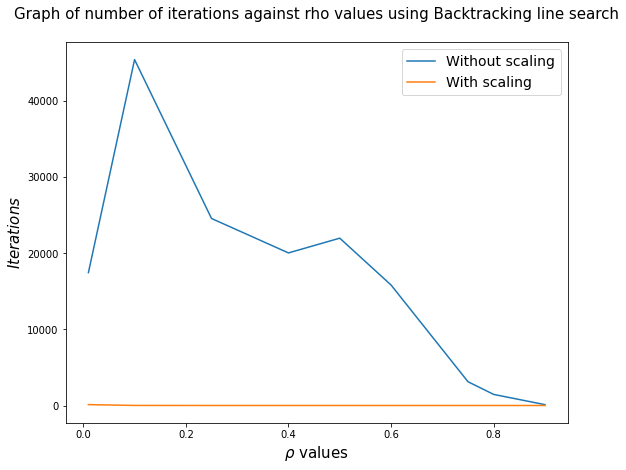

In [220]:
plt.figure(figsize=(9,7))
plt.plot(rho_values, iteration_counter,label=r'$ $')
plt.title('Graph of number of iterations against rho values using Backtracking line search\n',fontsize=15)
plt.plot(rho_values, iteration_counter_scaling,label= r'$ $') 
plt.xlabel(r'$\rho$ values',fontsize=15)
plt.ylabel(r'$Iterations$',fontsize=15)
plt.legend(["Without scaling", "With scaling"],fontsize=14)
plt.show()

As shown in the graph and observations table, number of iterations taken by backtracking algorithm with scaling is quite less than the number of iterations taken by backtracking algorithm without scaling. Since we are using scaling of backtracking, we are getting less iterations.

The minimizers and objective function values obtained for different choices of the $\rho$ values for the two algorithms are noted in the above tables. We can see that when we are using scaling, objective value and minimizers are more accurate than without scaling. Iterations are also quite lesser when we scale backtracking algorithm.